# Laila Mohamed Aborizka

### Task 6 - Prediction using Decision Tree Algorithm 

***

In [1]:
# we start by importing the libraries we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

***

### Reading Data and Preprocessing

In [2]:
# we read the data and check if it contains any missing values or needs preprocessing
df =pd.read_csv("Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# shape of the data 
np.shape(df)

(150, 5)

    We have 150 samples and none of the parameters needs encoding. 

In [4]:
#check for nulls 
df.isnull().values.any()

False

    No nulls so data is ready! 

In [5]:
#divide data
X=df.iloc[:,:-1].values
Y=df['Species']

In [6]:
#view X
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
#view Y
Y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

***

### Visualizing data 

Data visualization


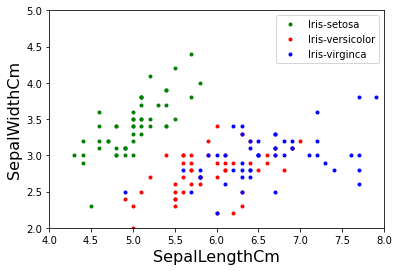

In [8]:
# Visualizing data 
# using two important features : SepalLengthCm and SepalWidthCm 
print('Data visualization')
plt.plot(X[Y=="Iris-setosa",0],X[Y=="Iris-setosa",1],'g.')
plt.plot(X[Y=="Iris-versicolor",0],X[Y=="Iris-versicolor",1],'r.')
plt.plot(X[Y=="Iris-virginica",0],X[Y=="Iris-virginica",1],'b.')
plt.xlabel('SepalLengthCm', fontsize=16)
plt.ylabel('SepalWidthCm', fontsize=16)
plt.ylim(2,5)
plt.xlim(4,8)
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginca'],loc='upper right')

***

### Splitting data

In [9]:
# 80% training
# 20% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=3)
print(np.shape(x_train),np.shape(x_test))

(120, 4) (30, 4)


***

### Finding the optimum depth using cross validation

    - Perform 10-fold cross validation.
    - Crossvalscore evaluates a score by cross-validation and returns an array of scores of the estimator (classifierTree) for each run of the cross validation.
    - Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy and scoring (a str to determine model evaluation criteria)

In [10]:
depth_List = list(range(1,10))
score = []
for m in depth_List:
    classifier = DecisionTreeClassifier(criterion="entropy",max_depth=m,random_state=3)
    scores = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    score.append(scores.mean())
print(score)
opt_depth = depth_List[score.index(max(score))]+1
print('The optimal number of levels is ', opt_depth)

[0.6666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
The optimal number of levels is  5


***

### Training with depth 5

In [11]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=opt_depth,random_state=3)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=3)

***

### Draw Tree

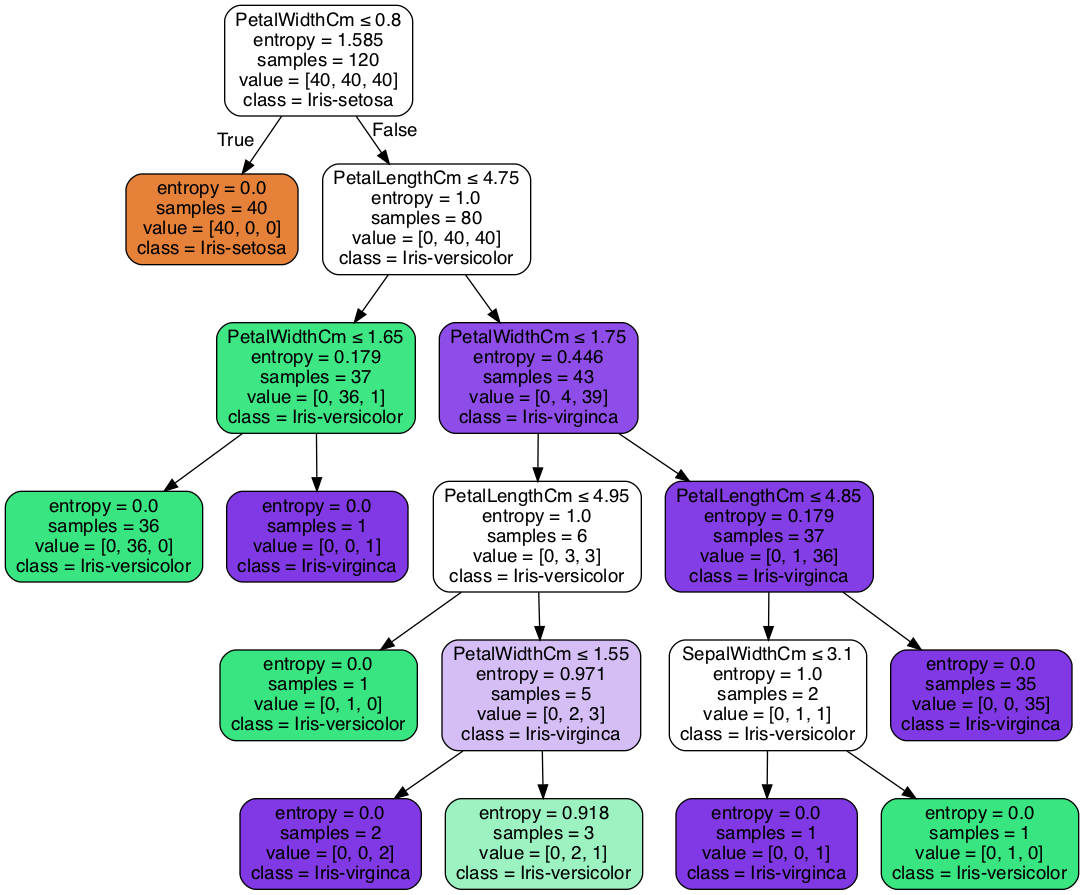

In [12]:
#Graphviz converts decision tree classifier into dot file
#Pydotplus convert this dot file to png or displayable form on Jupyter.
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa','Iris-versicolor','Iris-virginca']
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=classes)
tree = pydotplus.graph_from_dot_data(dot_data.getvalue())  
tree.write_png('tree.png')
Image(tree.create_png())

***

### Model Prediction

In [13]:
# use our model to predict classes 
y_pred = classifier.predict(x_test)

***

### Visualising Test and Predicted Data

Data visualization of original test data


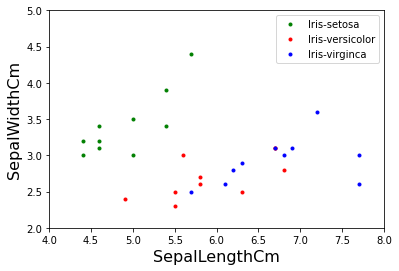

In [14]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test[y_test=="Iris-setosa",0],x_test[y_test=="Iris-setosa",1],'g.')
plt.plot(x_test[y_test=="Iris-versicolor",0],x_test[y_test=="Iris-versicolor",1],'r.')
plt.plot(x_test[y_test=="Iris-virginica",0],x_test[y_test=="Iris-virginica",1],'b.')
plt.xlabel('SepalLengthCm', fontsize=16)
plt.ylabel('SepalWidthCm', fontsize=16)
plt.ylim(2,5)
plt.xlim(4,8)
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginca'],loc='upper right')

Data visualization of original test data


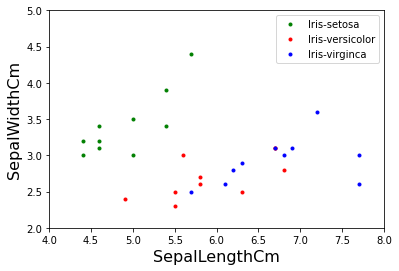

In [15]:
#plot predicted data
print('Data visualization of original test data')
plt.plot(x_test[y_pred=="Iris-setosa",0],x_test[y_pred=="Iris-setosa",1],'g.')
plt.plot(x_test[y_pred=="Iris-versicolor",0],x_test[y_pred=="Iris-versicolor",1],'r.')
plt.plot(x_test[y_pred=="Iris-virginica",0],x_test[y_pred=="Iris-virginica",1],'b.')
plt.xlabel('SepalLengthCm', fontsize=16)
plt.ylabel('SepalWidthCm', fontsize=16)
plt.ylim(2,5)
plt.xlim(4,8)
plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginca'],loc='upper right')

***

### Model Evaluation

In [16]:
# calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_tree)

Accuracy: 1.000


#### We can conclude that the model is pretty accurate !! 